In [1]:
# import the required libraries

import os
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# spotify auth creds

cid = 'xxxx'
secret = 'xxxx'
username = 'xxxx'
redirect_uri = 'http://localhost:8888/spotify-callback'

In [7]:
# perform auth

scope = 'user-top-read user-follow-read user-library-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=c302513a999444c6b36822aca1567e59&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fspotify-callback&scope=user-follow-read+user-library-read+user-read-recently-played+user-top-read in your browser


Enter the URL you were redirected to: http://localhost:8888/spotify-callback?code=AQDavRC1rFKmdMFxrK6APmbApOecB8SU2o_eYhC2hoChOXVP_7jCh1W0qxiLdqNnjAcKg5uYDfPLiciRxTJEtahK7csmOF2OFo7z2X-znTKIQtp1vCMXHRpN8sRJgIsgC6-MezOdSFsgiQ5IOxerqUgpIhQSFjnBrPPw6QWT-Dkfwf-wTdYlmdFJ3UxGVwcSmZUrOGROzc7yVB8wyrdYe1M2Z5rEKoObczOQYbwG5xgciDd6wQJswbNuQl0CkMzQY3XFAeR-T_VOlvBoGOF5bTHBiS0uch3u--tKbFbpHC21JmF3965KkNUPOg




In [10]:
# 1:fetch user's followed artists

if token:
    sp = spotipy.Spotify(auth=token)
    followed_artists_results = sp.current_user_followed_artists(limit=50)
    for i in range(50):
        list = []
        list.append(followed_artists_results)
        with open('followed_artists.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [11]:
# 2:fetch user's saved tracks

if token:
    sp = spotipy.Spotify(auth=token)
    saved_tracks_results = sp.current_user_saved_tracks(limit=50)
    for i in range(50):
        list = []
        list.append(saved_tracks_results)
        with open('saved_tracks.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [14]:
# # 3:fetch user's recently played tracks

# if token:
#     sp = spotipy.Spotify(auth=token)
#     recently_played_results = sp.current_user_recently_played(limit=50)
#     for i in range(50):
#         list = []
#         list.append(recently_played_results)
#         with open('recently_played.json', 'w', encoding='utf-8') as f:
#             json.dump(list, f, ensure_ascii=False, indent=4)
# else:
#     print("Can't get token for", username)

In [15]:
# 4:fetch user's top artists

if token:
    sp = spotipy.Spotify(auth=token)
    top_artists_results = sp.current_user_top_artists(limit=50,offset=0,time_range='long_term')
    for song in range(50):
        list = []
        list.append(top_artists_results)
        with open('top_artists.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [4]:
# fetch the top-50 tracks

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='long_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [5]:
# open the json file

with open('top50_data.json') as f:
  data = json.load(f)

In [34]:
# create lists of artists, songs, albums

list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [35]:
# Convert the pulled content to a pandas df

all_songs = pd.DataFrame({
    'artist': list_of_artist_names,
    'artist_uri': list_of_artist_uri,
    'song': list_of_song_names,
    'song_uri': list_of_song_uri,
    'duration_ms': list_of_durations_ms,
    'explicit': list_of_explicit,
    'album': list_of_albums,
    'popularity': list_of_popularity
})

In [36]:
all_songs.head()

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
0,James Arthur,spotify:artist:4IWBUUAFIplrNtaOHcJPRM,Say You Won't Let Go,spotify:track:1Pw5C4N6Fn5E4mGCxmbbVa,211240,False,Say You Won't Let Go,74
1,Westlife,spotify:artist:5Z1CCuBsyhEHngq3U5IraY,Better Man,spotify:track:2VFGae9mdQ2dc9373j6hPK,197013,False,Dynamite,28
2,Chelsea Football Club,spotify:artist:7oSMokU88ass03PKMUKz4p,Blue Is the Colour,spotify:track:0mkXiI7fIrzhQeKRHc8Ivv,144840,False,Blue Is the Colour,17
3,Ritviz,spotify:artist:72beYOeW2sb2yfcS4JsRvb,Jeet,spotify:track:4ye8U0982eHtlhlvePpxtP,184848,False,Jeet,61
4,Westlife,spotify:artist:5Z1CCuBsyhEHngq3U5IraY,Better Man - Acoustic,spotify:track:5xubZGA8wDDCZsO7GgCIek,193506,False,Better Man (Acoustic),52


In [37]:
all_songs.sort_values('popularity', ascending=False)

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
21,John Legend,spotify:artist:5y2Xq6xcjJb2jVM54GHK3t,All of Me,spotify:track:3U4isOIWM3VvDubwSI3y7a,269560,False,Love In The Future (Expanded Edition),84
46,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Photograph,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,258986,False,x (Deluxe Edition),83
48,Avicii,spotify:artist:1vCWHaC5f2uS3yhpwWbIA6,Wake Me Up,spotify:track:4h8VwCb1MTGoLKueQ1WgbD,247426,False,True,82
37,Calum Scott,spotify:artist:6ydoSd3N2mwgwBHtF6K7eX,Dancing On My Own,spotify:track:2BOqDYLOJBiMOXShCV1neZ,260285,False,Only Human (Deluxe),82
7,Anne-Marie,spotify:artist:1zNqDE7qDGCsyzJwohVaoX,2002,spotify:track:2BgEsaKNfHUdlh97KmvFyo,186986,False,Speak Your Mind (Deluxe),82
41,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Thinking out Loud,spotify:track:34gCuhDGsG4bRPIf9bb02f,281560,False,x (Deluxe Edition),82
24,Wiz Khalifa,spotify:artist:137W8MRPWKqSmrBGDBFSop,See You Again (feat. Charlie Puth),spotify:track:2JzZzZUQj3Qff7wapcbKjc,229525,False,See You Again (feat. Charlie Puth),80
18,Lauv,spotify:artist:5JZ7CnR6gTvEMKX4g70Amv,i'm so tired...,spotify:track:7COXchtUOMd6uIT6HvmRaI,162582,False,i'm so tired...,80
49,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,She Will Be Loved - Radio Mix,spotify:track:4llK75pXNWZz6KAho2Gp16,259453,False,Songs About Jane: 10th Anniversary Edition,79
10,Maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,Girls Like You (feat. Cardi B),spotify:track:6FRLCMO5TUHTexlWo8ym1W,235545,True,Girls Like You (feat. Cardi B),79


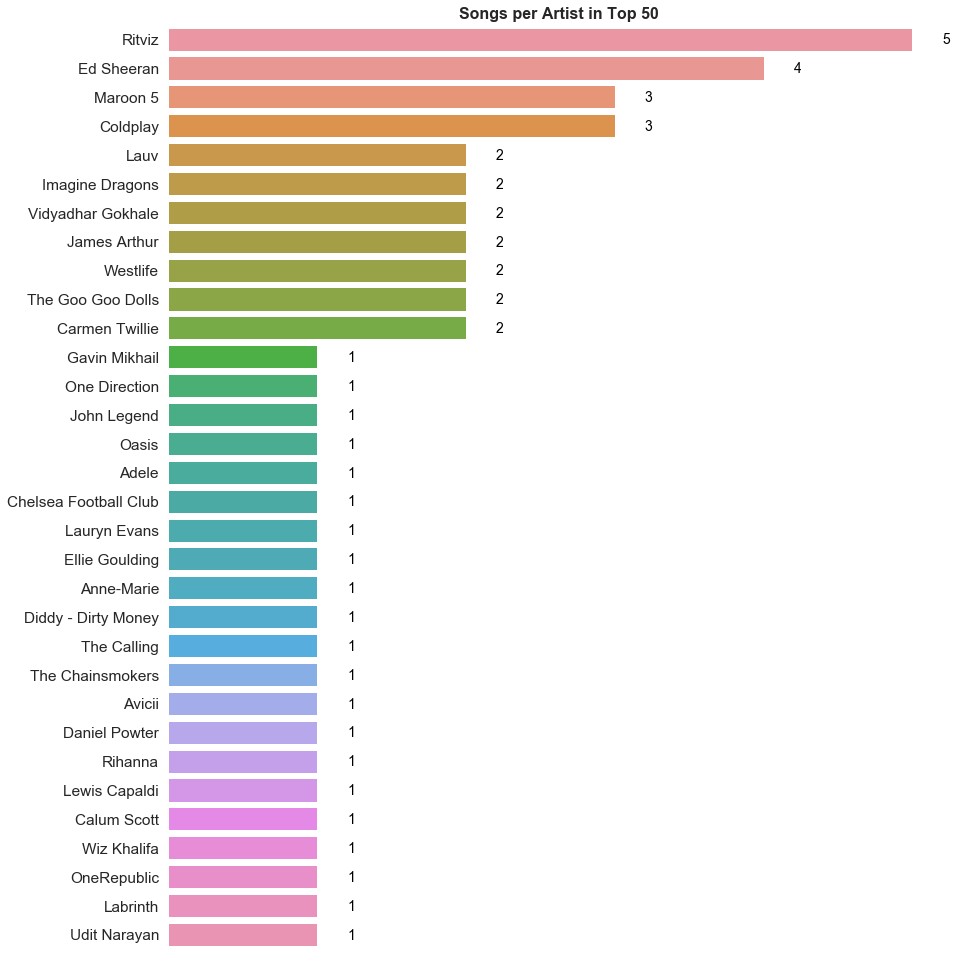

In [39]:
# plot songs per artist

descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(14,17)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()

In [82]:
# extract playlists

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

featured_playlists_ = sp.featured_playlists()
playlists = featured_playlists_['playlists']
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: Mega Hit Mix, Playlist ID: 37i9dQZF1DXbYM3nMM0oPk, No Tracks: 75
Name: Lazy Sunday, Playlist ID: 37i9dQZF1DWTc452KG008d, No Tracks: 70
Name: Peaceful Piano, Playlist ID: 37i9dQZF1DX4sWSpwq3LiO, No Tracks: 268
Name: Main Stage, Playlist ID: 37i9dQZF1DX7ZUug1ANKRP, No Tracks: 52
Name: Coffee Table Jazz, Playlist ID: 37i9dQZF1DWVqfgj8NZEp1, No Tracks: 132
Name: Evening Acoustic, Playlist ID: 37i9dQZF1DXcWBRiUaG3o5, No Tracks: 110
Name: Happy Hits!, Playlist ID: 37i9dQZF1DXdPec7aLTmlC, No Tracks: 100
Name: Funk & Soul Classics, Playlist ID: 37i9dQZF1DWWvhKV4FBciw, No Tracks: 80
Name: All Out 70s, Playlist ID: 37i9dQZF1DWTJ7xPn4vNaz, No Tracks: 100
Name: Lofi Hip-Hop, Playlist ID: 37i9dQZF1DX36Xw4IJIVKA, No Tracks: 99
Name: Stoner Rock, Playlist ID: 37i9dQZF1DXdpVGstUksUC, No Tracks: 90
Name: Feelin' Good, Playlist ID: 37i9dQZF1DX9XIFQuFvzM4, No Tracks: 100


In [79]:
def fetch_featured_playlists(sp, country=None, locale=None):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    f_playlists = sp.featured_playlists(country=country, locale=locale)
    playlists = f_playlists['playlists']
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [89]:
fetch_featured_playlists(sp, country='IN')

,id,name,#tracks
0,37i9dQZF1DXbYM3nMM0oPk,Mega Hit Mix,75
1,37i9dQZF1DWTc452KG008d,Lazy Sunday,70
2,37i9dQZF1DX4sWSpwq3LiO,Peaceful Piano,268
3,37i9dQZF1DX7ZUug1ANKRP,Main Stage,52
4,37i9dQZF1DWVqfgj8NZEp1,Coffee Table Jazz,132
5,37i9dQZF1DXcWBRiUaG3o5,Evening Acoustic,110
6,37i9dQZF1DXdPec7aLTmlC,Happy Hits!,100
7,37i9dQZF1DWWvhKV4FBciw,Funk & Soul Classics,80
8,37i9dQZF1DWTJ7xPn4vNaz,All Out 70s,100
9,37i9dQZF1DX36Xw4IJIVKA,Lofi Hip-Hop,99


In [86]:
def fetch_playlist_tracks(sp, playlist_id, market=None):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.playlist_tracks(playlist_id, fields=None, limit=50, offset=offset, market=market)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [90]:
fetch_playlist_tracks(sp, '37i9dQZF1DXbYM3nMM0oPk')

,track_id,track_name
0,322tcqPhma7F6hfCeLisx0,"fuck, i'm lonely"
1,4evmHXcjt3bTUHD1cvny97,Beautiful People (feat. Khalid)
2,2wrJq5XKLnmhRXHIAf9xBa,"10,000 Hours (with Justin Bieber)"
3,6LsAAHotRLMOHfCsSfYCsz,If I Can't Have You
4,1SNiXDwSilLujcYdvfqVpT,Call You Mine
...,...,...
70,2RSHsoi04658QL5xgQVov3,Bad Liar
71,0n2nEtLP3OzDdi12ziIekx,SOS
72,222B3aljXx6fFwKmFjuBED,Woman Like Me (feat. Nicki Minaj)
73,0CZ8lquoTX2Dkg7Ak2inwA,1950


In [88]:
def fetch_audio_features(sp, playlist_id):
    playlist = fetch_playlist_tracks(sp, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [93]:
# fetch the audio features in a df and inspect the df

df = fetch_audio_features(sp, '37i9dQZF1DXbYM3nMM0oPk')
display(df.shape)
df.head()

(75, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
322tcqPhma7F6hfCeLisx0,"fuck, i'm lonely",0.806,0.558,95.016,-6.460,0.678,0.0683,0.0,0.0618,0.482
4evmHXcjt3bTUHD1cvny97,Beautiful People (feat. Khalid),0.640,0.648,92.977,-8.113,0.548,0.1870,0.0,0.0802,0.124
2wrJq5XKLnmhRXHIAf9xBa,"10,000 Hours (with Justin Bieber)",0.654,0.630,89.991,-4.644,0.430,0.0259,0.0,0.1110,0.153
6LsAAHotRLMOHfCsSfYCsz,If I Can't Have You,0.692,0.809,123.911,-4.198,0.864,0.0602,0.0,0.1470,0.524
1SNiXDwSilLujcYdvfqVpT,Call You Mine,0.591,0.702,104.003,-5.590,0.501,0.0289,0.0,0.4140,0.225


In [94]:
# normalize the % columns

for feature in df.columns:
    if feature == 'tempo' or feature == 'loudness':
        continue
    df[feature] = df[feature] * 100

In [95]:
def fetch_audio_features(sp, playlist_id):
    """
    Returns the selected audio features of every track, 
    for the given playlist.
    """
    
    playlist = fetch_playlist_tracks(sp, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Append the audio features in a list
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence'])

    # Set the 'tempo' & 'loudness' in the same range with the rest features
    for feature in df_audio_features.columns:
        if feature == 'tempo' or feature == 'loudness':
            continue
        df_audio_features[feature] = df_audio_features[feature] * 100
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
    
    return df_playlist_audio_features

In [96]:
df = fetch_audio_features(sp, '37i9dQZF1DXbYM3nMM0oPk')
df.head()

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
322tcqPhma7F6hfCeLisx0,"fuck, i'm lonely",80.6,55.8,95.016,-6.460,67.8
4evmHXcjt3bTUHD1cvny97,Beautiful People (feat. Khalid),64.0,64.8,92.977,-8.113,54.8
2wrJq5XKLnmhRXHIAf9xBa,"10,000 Hours (with Justin Bieber)",65.4,63.0,89.991,-4.644,43.0
6LsAAHotRLMOHfCsSfYCsz,If I Can't Have You,69.2,80.9,123.911,-4.198,86.4
1SNiXDwSilLujcYdvfqVpT,Call You Mine,59.1,70.2,104.003,-5.590,50.1


In [97]:
# assemble the features of 2 separate playlists for comparison

df_mega_hit_mix = fetch_audio_features(sp, '37i9dQZF1DXbYM3nMM0oPk')
df_lazy_sunday = fetch_audio_features(sp, '37i9dQZF1DWTc452KG008d')

In [98]:
df_lazy_sunday.head()

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
5Apvsk0suoivI1H8CmBglv,Almost (Sweet Music),52.3,68.7,90.036,-5.601,71.1
6iey2E15nqKQ60KW8vBQQi,Stay Awake,72.7,79.7,106.033,-7.956,60.0
4RE3vueod5PL48rvHtuu9C,Peer Pressure,63.1,71.5,135.826,-6.083,42.0
6UnCGAEmrbGIOSmGRZQ1M2,Light On,65.7,56.9,102.054,-6.287,39.9
42bbDWZ8WmXTH7PkYAlGLu,Hold My Girl,61.4,52.7,121.941,-6.374,35.4


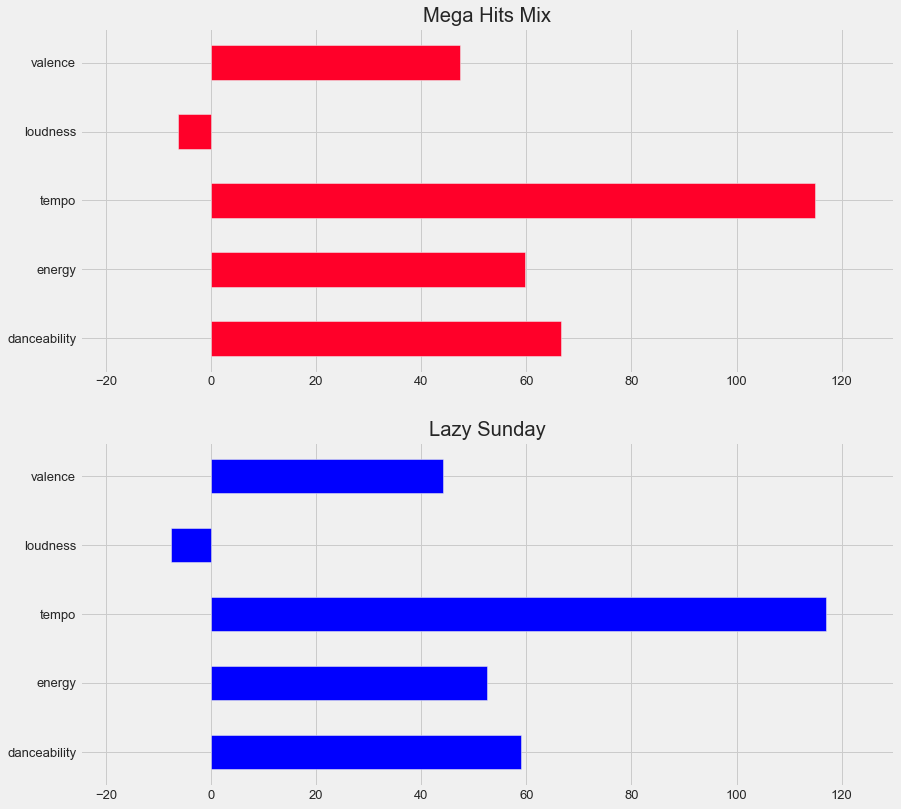

In [102]:
# Create a figure for comparing the 2 playlists in terms of their features

plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 13))
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=.2, wspace=.5)

# left
df_mega_hit_mix.mean().plot.barh(ax=ax1, colormap='gist_rainbow', fontsize=13)
ax1.set_xlim(-25,130)

# right
df_lazy_sunday.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25,130)

# Create axis titles
ax1.set_title('Mega Hits Mix')
ax2.set_title('Lazy Sunday')

plt.show()

In [104]:
# compare the means of each feature

display(df_mega_hit_mix.mean())
display(df_mega_hit_mix.shape)
display(df_lazy_sunday.mean())
df_lazy_sunday.shape

danceability     66.645333
energy           59.821333
tempo           114.924987
loudness         -6.385053
valence          47.327867
dtype: float64

(75, 6)

danceability     59.045714
energy           52.552857
tempo           117.065614
loudness         -7.679214
valence          44.208571
dtype: float64

(70, 6)

In [105]:
mega_hits_mean = pd.DataFrame(df_mega_hit_mix.mean(), columns= ['mega_hits_playlist'])
lazy_sunday_mean = pd.DataFrame(df_lazy_sunday.mean(), columns= ['lazy_sunday_playlist'])
hits_lazy_mean = pd.concat([mega_hits_mean, lazy_sunday_mean], axis=1)
hits_lazy_mean

,mega_hits_playlist,lazy_sunday_playlist
danceability,66.645333,59.045714
energy,59.821333,52.552857
tempo,114.924987,117.065614
loudness,-6.385053,-7.679214
valence,47.327867,44.208571


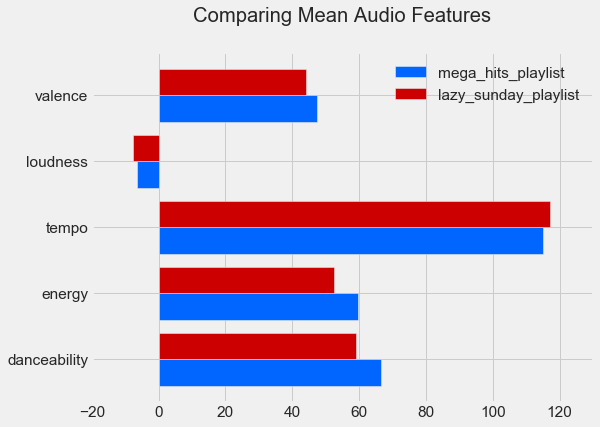

In [106]:
# feature-wise comparison

plt.style.use('fivethirtyeight')

hits_lazy_mean.plot.barh(color = ['#0066FF', '#CC0000'],  width = .8, rot = 0, figsize = (8,6))
plt.title('Comparing Mean Audio Features', y = 1.07)
plt.xlim(-20,130) # because ratings start at 0 and end at 5
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

In [107]:
df_mega_hit_mix.describe()

,danceability,energy,tempo,loudness,valence
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,66.645333,59.821333,114.924987,-6.385053,47.327867
std,12.542321,15.962221,27.678476,2.153682,20.661401
min,35.100000,10.400000,68.534000,-14.080000,5.920000
25%,58.750000,51.950000,97.003000,-7.417000,33.800000
50%,65.900000,62.300000,105.049000,-6.273000,44.900000
75%,75.950000,70.300000,131.495500,-4.839500,62.300000
max,91.300000,88.200000,190.097000,-2.253000,95.200000


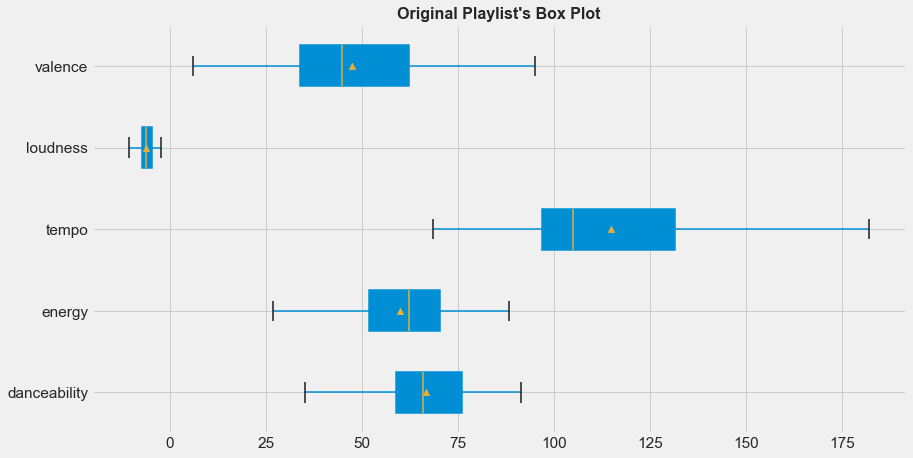

In [108]:
# boxplot inspection

df_mega_hit_mix.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Original Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [111]:
# add in a 'score' factor with a weighted equation of the audio features

df_mega_hit_mix['score'] = df_mega_hit_mix['danceability'] * 30 + df_mega_hit_mix['energy'] * 20 + df_mega_hit_mix['tempo'] * 20 + df_mega_hit_mix['loudness'] * 10 + df_mega_hit_mix['valence'] * 20
display(df_mega_hit_mix.describe())

df_lazy_sunday['score'] = df_lazy_sunday['danceability'] * 30 + df_lazy_sunday['energy'] * 20 + df_lazy_sunday['tempo'] * 20 + df_lazy_sunday['loudness'] * 10 + df_lazy_sunday['valence'] * 20
display(df_lazy_sunday.describe())

,danceability,energy,tempo,loudness,valence,score
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,66.645333,59.821333,114.924987,-6.385053,47.327867,6376.993200
std,12.542321,15.962221,27.678476,2.153682,20.661401,935.319836
min,35.100000,10.400000,68.534000,-14.080000,5.920000,4089.590000
25%,58.750000,51.950000,97.003000,-7.417000,33.800000,5827.590000
50%,65.900000,62.300000,105.049000,-6.273000,44.900000,6479.220000
75%,75.950000,70.300000,131.495500,-4.839500,62.300000,6985.805000
max,91.300000,88.200000,190.097000,-2.253000,95.200000,8606.510000


,danceability,energy,tempo,loudness,valence,score
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,59.045714,52.552857,117.065614,-7.679214,44.208571,5971.120143
std,11.531528,17.539361,28.663541,2.518006,20.480516,985.668662
min,29.600000,13.700000,74.619000,-15.569000,13.100000,3650.210000
25%,54.350000,42.200000,94.285500,-9.547750,29.675000,5380.662500
50%,58.650000,53.150000,118.543500,-6.713000,40.950000,6112.445000
75%,67.425000,66.175000,133.701500,-5.804000,56.225000,6557.232500
max,89.100000,88.800000,180.942000,-3.989000,96.400000,8583.460000


Text(0.5, 1.0, 'KDE plots of Playlists')

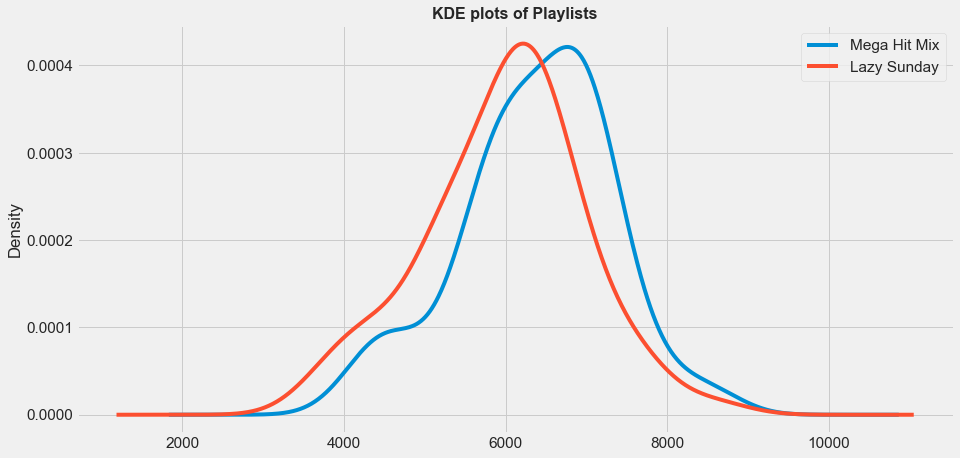

In [113]:
# plot kde for score for each of the playlists

df_mega_hit_mix['score'].plot.kde(figsize=(14,7), label='Mega Hit Mix', legend=True)
df_lazy_sunday['score'].plot.kde(figsize=(14,7), label='Lazy Sunday', legend=True)

plt.title('KDE plots of Playlists', fontsize=16, fontweight='heavy')